### Context
This is an exploratory data analytics done on a Kaggle dataset containing data of the Height of Male and Female by Country (2022).

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from pandas_profiling import ProfileReport
%matplotlib inline

In [48]:
#Load the dataset
height_cdf = pd.read_csv('/Users/kanchanas/Desktop/Height of Male and Female by Country 2022.csv')

In [49]:
height_cdf.shape

(199, 6)

In [50]:
height_cdf.head(5)

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In [51]:
height_cdf.tail(5)

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
194,195,Mozambique,164.30,155.42,5.39,5.10
195,196,Papua New Guinea,163.10,156.89,5.35,5.15
196,197,Solomon Islands,163.07,156.79,5.35,5.14
197,198,Laos,162.78,153.10,5.34,5.02
198,199,Timor-Leste,160.13,152.71,5.25,5.01


In [52]:
height_cdf.columns

Index(['Rank', 'Country Name', 'Male Height in Cm', 'Female Height in Cm',
       'Male Height in Ft', 'Female Height in Ft'],
      dtype='object')

In [53]:
height_cdf.dtypes

Rank                     int64
Country Name            object
Male Height in Cm      float64
Female Height in Cm    float64
Male Height in Ft      float64
Female Height in Ft    float64
dtype: object

In [54]:
#Descriptive statistics
height_cdf.describe()

,Rank,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,173.089045,160.942915,5.678794,5.280402
std,57.590508,4.949832,4.076377,0.162510,0.133870
min,1.000000,160.130000,150.910000,5.250000,4.950000
25%,50.500000,169.490000,158.240000,5.560000,5.190000
50%,100.000000,173.530000,160.620000,5.690000,5.270000
75%,149.500000,176.510000,163.870000,5.790000,5.375000
max,199.000000,183.780000,170.360000,6.030000,5.590000


The average male height in cm is approximately 173.89cm, the minumum height is 160.13cm and the maximum height is 183.78cm. The average female height in cm is approximately 160.94cm, the minimum height is 150.91cm and the maximum height is 170.36cm.

In [55]:
height_cdf.info

<bound method DataFrame.info of      Rank            Country Name  Male Height in Cm  Female Height in Cm  \
0       1             Netherlands             183.78               170.36   
1       2              Montenegro             183.30               169.96   
2       3                 Estonia             182.79               168.66   
3       4  Bosnia and Herzegovina             182.47               167.47   
4       5                 Iceland             182.10               168.91   
..    ...                     ...                ...                  ...   
194   195              Mozambique             164.30               155.42   
195   196        Papua New Guinea             163.10               156.89   
196   197         Solomon Islands             163.07               156.79   
197   198                    Laos             162.78               153.10   
198   199             Timor-Leste             160.13               152.71   

     Male Height in Ft  Female Height in Ft

In [56]:
#Checking for missing values
height_cdf.isnull().sum()

Rank                   0
Country Name           0
Male Height in Cm      0
Female Height in Cm    0
Male Height in Ft      0
Female Height in Ft    0
dtype: int64

In [57]:
#Will drop the columns that are not needed for this analysis
height_cdf.drop(['Rank','Male Height in Ft','Female Height in Ft'],axis=1,inplace=True)

In [58]:
height_cdf.head(2)

,Country Name,Male Height in Cm,Female Height in Cm
0,Netherlands,183.78,170.36
1,Montenegro,183.30,169.96


### Plotting of histograms to see the height (cm) distribution for each gender.

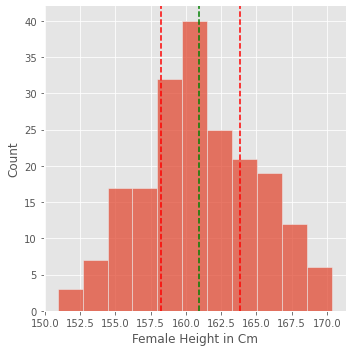

In [59]:
sns.displot(height_cdf['Female Height in Cm'])
plt.axvline(x=np.mean(height_cdf['Female Height in Cm']),c='green',ls='--',label='mean')
plt.axvline(x=np.percentile(height_cdf['Female Height in Cm'],25),c='red',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(height_cdf['Female Height in Cm'],75),c='red',ls='--')

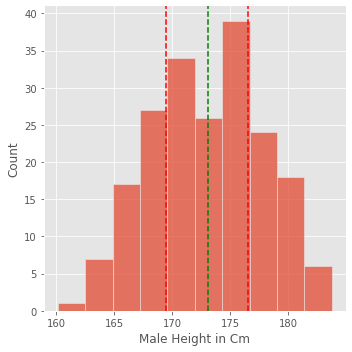

In [60]:
sns.displot(height_cdf['Male Height in Cm'])
plt.axvline(x=np.mean(height_cdf['Male Height in Cm']),c='green',ls='--',label='mean')
plt.axvline(x=np.percentile(height_cdf['Male Height in Cm'],25),c='red',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(height_cdf['Male Height in Cm'],75),c='red',ls='--')

array([[<AxesSubplot:title={'center':'Male Height in Cm'}>,
        <AxesSubplot:title={'center':'Female Height in Cm'}>]],
      dtype=object)

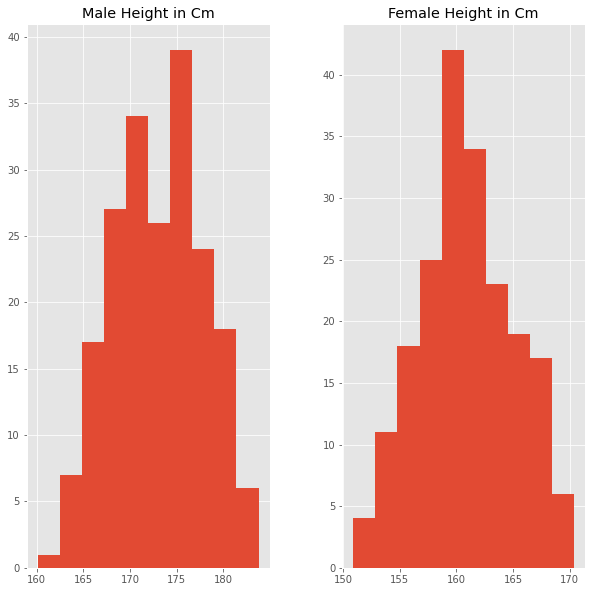

In [62]:
height_cdf.hist(figsize=(10,10))

<AxesSubplot:>

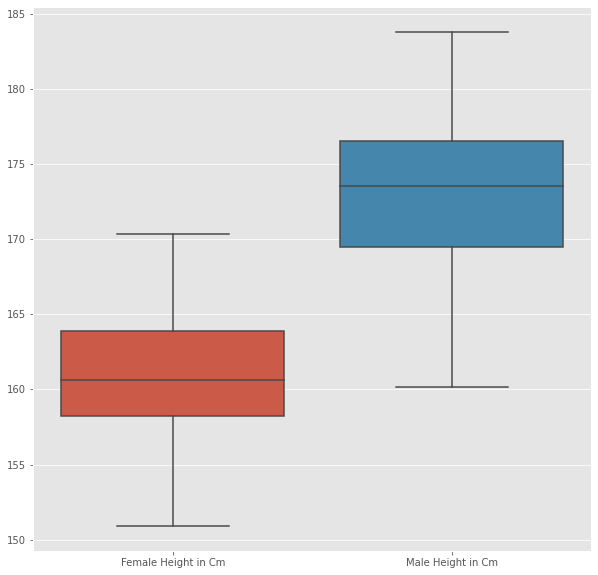

In [73]:
plt.figure(figsize=(10,10))
sns.boxplot(data = height_cdf.loc[:,['Female Height in Cm', 'Male Height in Cm']])

An interesting takeaway from the boxplot analysis above would be that the minimum height of males looks to be approximately the same as the median height of females. This value looks to be around 160.2cm. Also, there are no outliers for both the female and male heights.

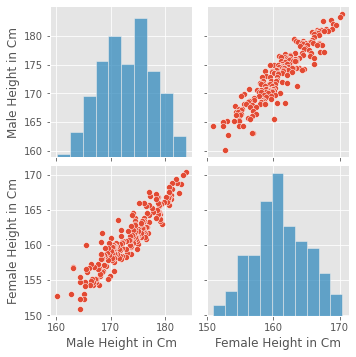

In [74]:
#To plot all the bivariate relationships possible
sns.pairplot(height_cdf)

In [75]:
#Correlation Analysis
height_cdf.corr()

,Male Height in Cm,Female Height in Cm
Male Height in Cm,1.000000,0.928787
Female Height in Cm,0.928787,1.000000


In [76]:
np.round(height_cdf.corr(),2)

,Male Height in Cm,Female Height in Cm
Male Height in Cm,1.00,0.93
Female Height in Cm,0.93,1.00


<AxesSubplot:>

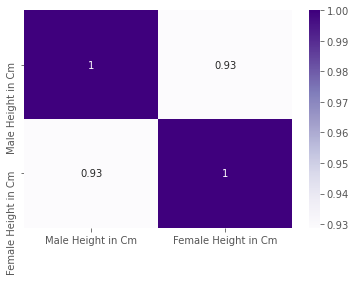

In [135]:
sns.heatmap(height_cdf.corr(),annot=True, cmap='Purples')

### Countries with the Tallest/Shortest Males and Females

In [121]:
tallestmale_height = height_cdf.sort_values(by='Male Height in Cm', ascending=False).head(10)[['Country Name', 'Male Height in Cm']]
tallestfemale_height = height_cdf.sort_values(by='Female Height in Cm', ascending=False).head(10)[['Country Name', 'Female Height in Cm']]

<ipython-input-139-4bd7f03b8a94>:7: UserWarning: Attempting to set identical left == right == 180 results in singular transformations; automatically expanding.
  mx.set_xlim(180, 180)


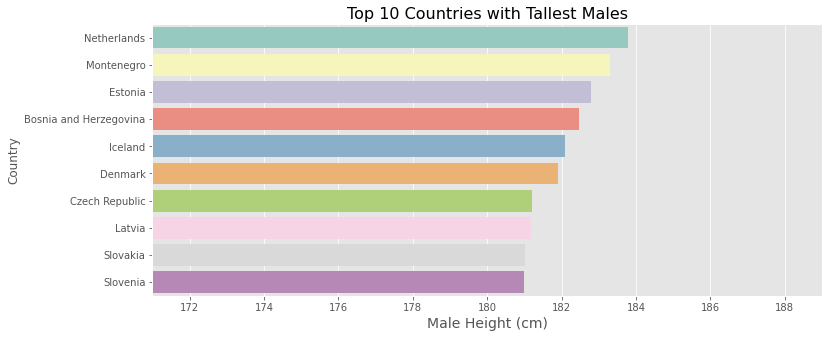

In [139]:
plt.figure(figsize=(12, 5))

mx = sns.barplot(x='Male Height in Cm', 
                 y='Country Name', 
                 data=tallestmale_height, 
                 palette='Set3')
mx.set_xlim(180, 180)
mx.set_title('Top 10 Countries with Tallest Males',
             fontsize=16, 
             pad=5)
mx.set_xlabel('Male Height (cm)',
              fontsize=14)
mx.set_ylabel('Country')
plt.show()

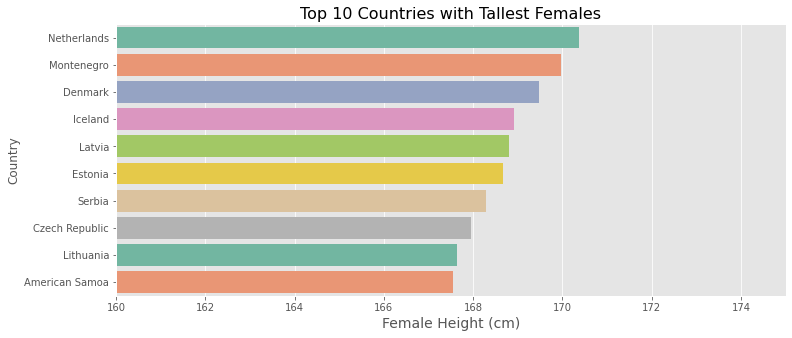

In [129]:
plt.figure(figsize=(12, 5))

fx = sns.barplot(x='Female Height in Cm', 
                 y='Country Name', 
                 data=tallestfemale_height, 
                 palette='Set2')
fx.set_xlim(160, 175)
fx.set_title('Top 10 Countries with Tallest Females',
             fontsize=16, 
             pad=5)
fx.set_xlabel('Female Height (cm)',
              fontsize=14)
fx.set_ylabel('Country')
plt.show()

In [122]:
shortestmale_height = height_cdf.sort_values(by='Male Height in Cm' ,ascending=False).tail(10)[['Country Name', 'Male Height in Cm'
                                                                                               ]]
shortestfemale_height = height_cdf.sort_values(by='Female Height in Cm' ,ascending=False).tail(10)[['Country Name', 'Female Height in Cm']]

<ipython-input-123-c131f6070be2>:7: UserWarning: Attempting to set identical left == right == 180 results in singular transformations; automatically expanding.
  mx.set_xlim(180, 180)


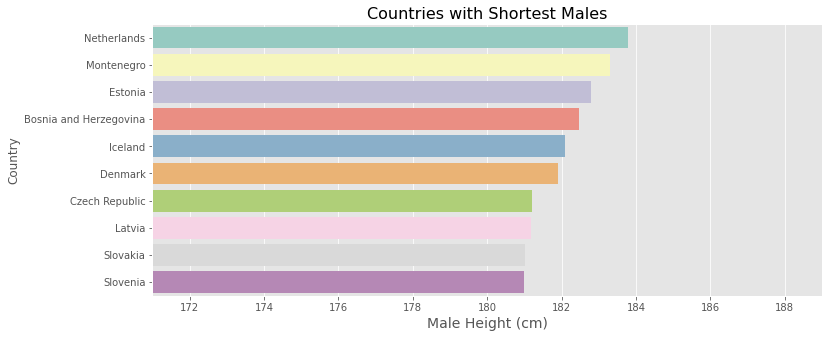

In [123]:
plt.figure(figsize=(12, 5))

mx = sns.barplot(x='Male Height in Cm', 
                 y='Country Name', 
                 data=tallestmale_height, 
                 palette='Set3')
mx.set_xlim(180, 180)
mx.set_title('Countries with Shortest Males',
             fontsize=16, 
             pad=5)
mx.set_xlabel('Male Height (cm)',
              fontsize=14)
mx.set_ylabel('Country')
plt.show()

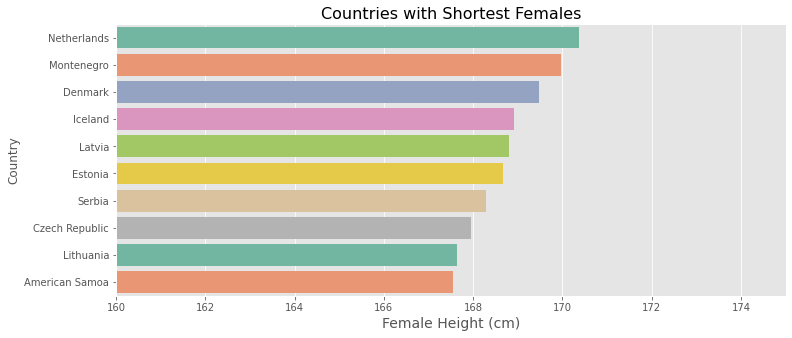

In [128]:
plt.figure(figsize=(12, 5))

fx = sns.barplot(x='Female Height in Cm', 
                 y='Country Name', 
                 data=tallestfemale_height, 
                 palette='Set2')
fx.set_xlim(160, 175)
fx.set_title('Countries with Shortest Females',
             fontsize=16, 
             pad=5)
fx.set_xlabel('Female Height (cm)',
              fontsize=14)
fx.set_ylabel('Country')
plt.show()